# 프로젝트 설명

In [1]:
import sys; sys.path.append("..") 
from src.utility import *

project_name = "dual_attention"
createfolder("./data")
createfolder("./model")
createfolder("./result")
createfolder("./graph")

data_path = './data'
model_path = './model'
result_path = './result'
graph_path = './graph'

## Raw data

In [2]:
raw_data = loadfile(data_path, "raw data", 'csv')
display(raw_data.info())
display(raw_data.describe())

csv file is loaded from ./data/raw data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83701 entries, 0 to 83700
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            83701 non-null  int64  
 1   Day              83701 non-null  int64  
 2   Hour             83701 non-null  int64  
 3   Minute           83701 non-null  int64  
 4   FT-3061-2        83701 non-null  float64
 5   TT-3061-1        83701 non-null  float64
 6   TT-3061-2        83701 non-null  float64
 7   PT-3061-2        83701 non-null  float64
 8   FT-3061-4        83701 non-null  float64
 9   TT-3061-5        83701 non-null  float64
 10  TT-3061-3        83701 non-null  float64
 11  TT-3061-4        83701 non-null  float64
 12  TT-3061-6        83701 non-null  float64
 13  PT-3061-3 (old)  83701 non-null  float64
 14  LT-3061-2        83701 non-null  float64
 15  FT-3061-3        83701 non-null  float64
 16  FT-3062-1     

None

,Month,Day,Hour,Minute,FT-3061-2,TT-3061-1,TT-3061-2,PT-3061-2,FT-3061-4,TT-3061-5,TT-3061-3,TT-3061-4,TT-3061-6,PT-3061-3 (old),LT-3061-2,FT-3061-3,FT-3062-1
count,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000
mean,11.139795,15.541977,11.477318,29.499648,29.559141,29.222028,25.539743,-0.430313,22.591501,30.624912,48.269577,66.736512,63.175855,-0.329969,28.591552,56.274025,24.231841
std,0.681425,8.967264,6.931991,17.318402,35.428486,21.361876,17.809541,0.475763,26.384841,22.120893,39.597746,55.663624,51.600359,0.375344,30.572621,62.235262,31.711250
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.993000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.940000,0.000000,0.000000,0.000000
25%,11.000000,8.000000,5.000000,14.000000,0.000000,8.000000,7.100000,-0.960000,0.000000,6.800000,7.000000,8.700000,8.900000,-0.720000,0.000000,0.000000,0.000000
50%,11.000000,15.000000,11.000000,29.000000,0.800000,17.600000,25.000000,-0.013000,0.000000,40.600000,38.500000,62.000000,60.600000,-0.015000,24.200000,0.000000,24.600000
75%,12.000000,24.000000,17.000000,44.000000,65.700000,52.600000,42.100000,-0.001000,48.600000,45.800000,88.700000,126.600000,118.900000,-0.004000,52.800000,123.200000,42.600000
max,12.000000,31.000000,23.000000,59.000000,200.000000,57.200000,108.800000,0.214000,225.400000,113.500000,126.700000,137.700000,128.700000,0.459000,100.000000,300.000000,1092.100000


# Data preprocessing

In [3]:
# Define variables
input_var   = ["FT-3061-2", "FT-3061-3", "FT-3061-4", "FT-3062-1"]
output_var  = ["TT-3061-3", "TT-3061-4", "LT-3061-2"]
process_var = input_var + output_var

## data clustering

In [4]:
from src import clustering

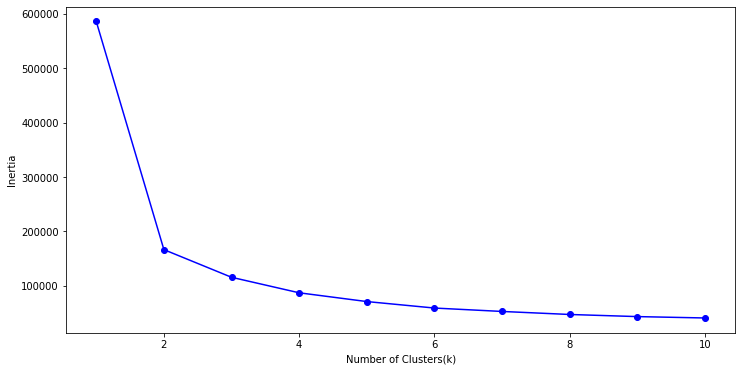

In [5]:
kmean_test = clustering.KmeanCluster(raw_data, target_var=process_var)
kmean_test.test_inertia()

In [6]:
# plot information
plot_var = ["FT-3061-2", "FT-3061-3", "FT-3062-1", "TT-3061-3", "TT-3061-4", "LT-3061-2"]
save_fig = False

for i in range(2,6):
    kmean_cluster.model(i)
    kmean_cluster.plot(plot_var=plot_var,
                       fig_ratio=(3,1), subplot=(3,2),
                       fig_name=f"cluster{i}", save_fig=save_fig)

NameError: name 'kmean_cluster' is not defined

In [ ]:
cluster_path = data_path + '/1_cluster'
createfolder(cluster_path)

for num_cluster in range(2,12):
    print(f"number of clusters: {num_cluster}")
    kmean = clustering.KmeanCluster(raw_data, target_var=process_var)
    kmean.model(num_cluster=num_cluster)
    kmean.plot(['FT-3061-2', 'TT-3061-3'], fig_ratio=(2,1), subplot=(1,2))
    df_cluster = kmean.df
    df_on = df_cluster[df_cluster['color']==df_cluster['color'].iloc[5000]]
    
    if not exists(cluster_path, f'cluster_{num_cluster}', 'csv'):
        savefile(df_on, cluster_path, f'cluster_{num_cluster}', 'csv')


'\nfor num_cluster in range(2,12):\n    print(f"number of clusters: {num_cluster}")\n    kmean = clustering.KmeanCluster(raw_data, target_var=process_var)\n    kmean.model(num_cluster=num_cluster)\n    #kmean.plot([\'FT-3061-2\', \'TT-3061-3\'], fig_ratio=(2,1), subplot=(1,2))\n    df_cluster = kmean.df\n    df_on = df_cluster[df_cluster[\'color\']==df_cluster[\'color\'].iloc[5000]]\n    \n    if not exists(cluster_path, f\'cluster_{num_cluster}\', \'csv\'):\n        savefile(df_on, cluster_path, f\'cluster_{num_cluster}\', \'csv\')\n'

운전데이터를 최대한 깔끔하게 분리하기 위해 cluster의 개수를 증가시킴

Cluster 개수가 9개부터 운전데이터가 2 덩어리로 분리되었음.

--> __최대한 많은 운전데이터를 보존하기 위해 cluster 개수를 8개로 설정__

In [ ]:
df_cluster = loadfile(cluster_path, "cluster_8", 'csv')
df_cluster.describe()

csv file is loaded from ./data/1_cluster/cluster_8.csv


,Month,Day,Hour,Minute,FT-3061-2,TT-3061-1,TT-3061-2,PT-3061-2,FT-3061-4,TT-3061-5,TT-3061-3,TT-3061-4,TT-3061-6,PT-3061-3 (old),LT-3061-2,FT-3061-3,FT-3062-1,cluster
count,33219.000000,33219.000000,33219.000000,33219.000000,33219.000000,33219.000000,33219.000000,33219.000000,33219.000000,33219.000000,33219.000000,33219.000000,33219.000000,33219.000000,33219.000000,33219.000000,33219.000000,33219.0
mean,10.978145,13.800626,11.415274,29.440350,69.391445,51.911936,42.254529,-0.960183,49.082363,48.253656,90.780623,126.137746,118.036822,-0.740799,49.429104,123.801484,41.503652,2.0
std,0.687531,7.537221,7.034373,17.275863,12.344266,4.023178,1.517365,0.005901,6.941570,8.410738,7.226183,6.900962,6.342885,0.054383,10.904466,16.202560,11.674266,0.0
min,10.000000,1.000000,0.000000,0.000000,0.000000,15.000000,24.300000,-0.976000,0.000000,39.100000,36.900000,41.800000,38.700000,-0.940000,4.500000,65.800000,0.000000,2.0
25%,11.000000,8.000000,5.000000,15.000000,60.700000,50.500000,41.300000,-0.962000,44.900000,43.400000,85.700000,124.000000,115.800000,-0.765000,43.500000,112.800000,36.000000,2.0
50%,11.000000,13.000000,11.000000,29.000000,70.300000,53.000000,42.300000,-0.960000,49.000000,45.300000,90.000000,127.500000,119.700000,-0.724000,50.100000,126.000000,42.500000,2.0
75%,11.000000,18.000000,18.000000,44.000000,75.700000,54.300000,43.200000,-0.958000,53.000000,49.800000,95.500000,130.400000,121.600000,-0.708000,56.100000,136.800000,47.700000,2.0
max,12.000000,28.000000,23.000000,59.000000,152.800000,57.200000,99.500000,0.000000,129.200000,112.700000,115.600000,137.200000,127.800000,0.009000,90.400000,300.000000,131.100000,2.0


## Domain knowledge

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

domain_path = data_path + '/2_domain'
createfolder(domain_path)

sns.pairplot(df_cluster[process_var])
plt.savefig("./graph/pairplot/cluster3 df_on process_var.png", dpi=500)


'\nsns.pairplot(df_cluster[process_var])\nplt.savefig("./graph/pairplot/cluster3 df_on process_var.png", dpi=500)\n'

FT-3061-2, FT-3061-3, LT-3061-2 등 여러 공정 변수에서 0 값에 부딪히는 데이터가 많이 존재함.

__--> "운전 데이터는 데이터 값이 0보다 커야 한다는 domain knowledge를 이용하여 데이터 처리__ 

In [ ]:
# Remove 0 data

target_data = df_cluster
target_var = process_var

# filter data larger than value 0
df_domain = target_data[(target_data[target_var] > 0).all(axis=1)]

if not exists(domain_path, 'cluster_8_domain'):
    savefile(df_domain, domain_path, 'cluster_8_domain')

## Filter continuous data

In [ ]:
from src.dataprocessing import ctsfilter
continuous_path = data_path + '/3_continuous'

for min_len in [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    cts_df_list = ctsfilter(df_domain, min_len)
    print()
    
    if not exists(continuous_path, f'cts_{min_len}', 'model'):
        createfolder(continuous_path + f'/cts_{min_len}')
        for i, cts_df in enumerate(cts_df_list):
            savefile(cts_df, continuous_path + f'/cts_{min_len}', f"dataset {min_len}_{i+1}")


the number of continuous range [min 100]: 25
total number of data samples: 31746

the number of continuous range [min 200]: 21
total number of data samples: 31154

the number of continuous range [min 300]: 20
total number of data samples: 30919

the number of continuous range [min 400]: 19
total number of data samples: 30547

the number of continuous range [min 500]: 17
total number of data samples: 29633

the number of continuous range [min 600]: 15
total number of data samples: 28538

the number of continuous range [min 700]: 14
total number of data samples: 27877

the number of continuous range [min 800]: 13
total number of data samples: 27124

the number of continuous range [min 900]: 12
total number of data samples: 26243

the number of continuous range [min 1000]: 11
total number of data samples: 25302



최대한 많은 데이터를 보존하기 위해 최소 길이는 짧을수록 좋음.

__--> 최대 history size 100, 최대 prediction size 100을 고려하여 최소 길이를 200으로 설정__

In [ ]:
min_len = 200

cts_df_list = ctsfilter(df_domain, min_len)

the number of continuous range [min 200]: 21
total number of data samples: 31154


## Denoise

In [ ]:
from src.dataprocessing import EMA

denoise_path = data_path + '/4_denoise'

target_df_list = cts_df_list
target_var = process_var
alpha_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999]

for alpha in alpha_list:
    ema_df_list = []
    
    if not exists(denoise_path, f"denoise_{alpha}", 'model'):
        createfolder(denoise_path + f'/denoise_{alpha}')
        for i, target_df in enumerate(target_df_list):
            ema_df = EMA(target_df, alpha, target_var=target_var)
            ema_df_list.append(ema_df)
            savefile(ema_df, denoise_path, f"denoise_{alpha}/dataset {alpha}_{i+1}")           

In [ ]:
target_df_list = cts_df_list
target_var = process_var
alpha = 0.5

ema_df_list = []
for target_df in target_df_list:
    ema_df = EMA(target_df, alpha, target_var=target_var)
    ema_df_list.append(ema_df)